<a href="https://colab.research.google.com/github/yamayama3689/finance/blob/main/%E6%A0%AA%E4%BA%88%E6%B8%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/tmp/ipython-input-2633748869.py:11: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start= "2003-01-01",end="2023-03-15", interval = "1d",multi_level_index=False)
[*********************100%***********************]  1 of 1 completed


,Close,High,Low,Open,Date
0,0.978500,0.984000,0.927500,0.959500,2003-01-02
1,1.026000,1.026500,0.970500,0.979500,2003-01-03
2,1.035000,1.058500,1.015000,1.020000,2003-01-06
3,1.077500,1.087500,1.030000,1.041500,2003-01-07
4,1.051000,1.080000,1.041000,1.072000,2003-01-08
...,...,...,...,...,...
5079,93.919998,94.169998,92.180000,93.599998,2023-03-08
5080,92.250000,96.209999,92.180000,93.680000,2023-03-09
5081,90.730003,93.570000,90.250000,92.669998,2023-03-10
5082,92.430000,94.019997,88.120003,89.970001,2023-03-13


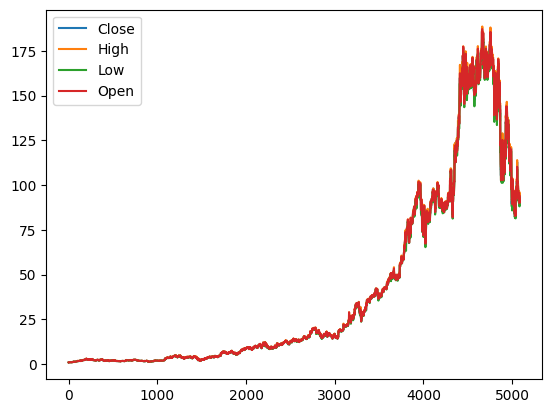

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
import yfinance as yf

#ターゲットを指定
ticker = "AMZN"

#データを収集
data = yf.download(ticker, start= "2003-01-01",end="2023-03-15", interval = "1d",multi_level_index=False)
df = data
#追加
df["Date"] = df.index
df = df.reset_index(drop=True)
df = df.drop("Volume", axis=1)
df_tmp = df.drop("Date",axis=1)
#可視化する
df_tmp.plot()
df

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5084 entries, 0 to 5083
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Close   5084 non-null   float64       
 1   High    5084 non-null   float64       
 2   Low     5084 non-null   float64       
 3   Open    5084 non-null   float64       
 4   Date    5084 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(4)
memory usage: 198.7 KB


In [56]:
# 曜日情報を追加(月曜:0, 火曜:1, 水曜:2, 木曜:3, 金曜:4、土曜:5、日曜:6)
df['weekday'] = df['Date'].dt.weekday
# 週番号付与
# 基準日からの通算週数を計算
# 基準日を定義
base_date = pd.to_datetime('2003-01-06')
df['cumulative_week'] = (df['Date'] - base_date).dt.days // 7

df

,Close,High,Low,Open,Date,weekday,cumulative_week
0,0.978500,0.984000,0.927500,0.959500,2003-01-02,3,-1
1,1.026000,1.026500,0.970500,0.979500,2003-01-03,4,-1
2,1.035000,1.058500,1.015000,1.020000,2003-01-06,0,0
3,1.077500,1.087500,1.030000,1.041500,2003-01-07,1,0
4,1.051000,1.080000,1.041000,1.072000,2003-01-08,2,0
...,...,...,...,...,...,...,...
5079,93.919998,94.169998,92.180000,93.599998,2023-03-08,2,1052
5080,92.250000,96.209999,92.180000,93.680000,2023-03-09,3,1052
5081,90.730003,93.570000,90.250000,92.669998,2023-03-10,4,1052
5082,92.430000,94.019997,88.120003,89.970001,2023-03-13,0,1053


In [57]:
# カラムの並び替え
df = df[['Date','cumulative_week', 'weekday', 'High', 'Low', 'Open', 'Close']] # 内側のカッコはリストの作成、外側のカッコはリストを最初からピックする
# データの並び替え
df.sort_values(by='Date', ascending=True, inplace=True) # inplace=Trueによってdfに直接変更を反映させる

In [58]:
df

,Date,cumulative_week,weekday,High,Low,Open,Close
0,2003-01-02,-1,3,0.984000,0.927500,0.959500,0.978500
1,2003-01-03,-1,4,1.026500,0.970500,0.979500,1.026000
2,2003-01-06,0,0,1.058500,1.015000,1.020000,1.035000
3,2003-01-07,0,1,1.087500,1.030000,1.041500,1.077500
4,2003-01-08,0,2,1.080000,1.041000,1.072000,1.051000
...,...,...,...,...,...,...,...
5079,2023-03-08,1052,2,94.169998,92.180000,93.599998,93.919998
5080,2023-03-09,1052,3,96.209999,92.180000,93.680000,92.250000
5081,2023-03-10,1052,4,93.570000,90.250000,92.669998,90.730003
5082,2023-03-13,1053,0,94.019997,88.120003,89.970001,92.430000


In [59]:
#カラム情報を1行上にずらしたデータフレームを作成する
df_shift = df.shift(-1)

In [60]:
df['delta_Close'] = df_shift['Close'] - df['Close']

In [61]:
# 目的変数upを使いする（翌日の終値が上がる場合1、それ以外は0とする）
df['Up'] = 0
df['Up'][df['delta_Close'] > 0] = 1
df = df.drop('delta_Close', axis=1)

/tmp/ipython-input-1198183633.py:3: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['Up'][df['delta_Close'] > 0] = 1
/tmp/ipython-input-1198183633.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFr

In [62]:
df

,Date,cumulative_week,weekday,High,Low,Open,Close,Up
0,2003-01-02,-1,3,0.984000,0.927500,0.959500,0.978500,1
1,2003-01-03,-1,4,1.026500,0.970500,0.979500,1.026000,1
2,2003-01-06,0,0,1.058500,1.015000,1.020000,1.035000,1
3,2003-01-07,0,1,1.087500,1.030000,1.041500,1.077500,0
4,2003-01-08,0,2,1.080000,1.041000,1.072000,1.051000,1
...,...,...,...,...,...,...,...,...
5079,2023-03-08,1052,2,94.169998,92.180000,93.599998,93.919998,0
5080,2023-03-09,1052,3,96.209999,92.180000,93.680000,92.250000,0
5081,2023-03-10,1052,4,93.570000,90.250000,92.669998,90.730003,1
5082,2023-03-13,1053,0,94.019997,88.120003,89.970001,92.430000,1


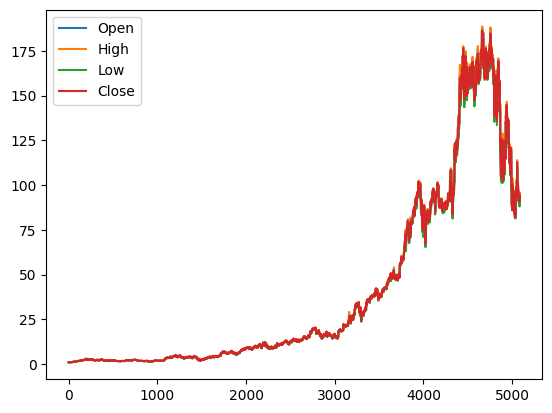

In [63]:
# データの全体像をつかむ

df_new = df[['Open','High','Low','Close']]

# 時系列折れ線グラフの作成
df_new.plot(kind='line')
plt.show()

In [64]:
# 特徴量の追加

# 終値の前日比
df_shift = df.shift(1) # 今日の終値 - 前日の終値

df['Close_ratio'] = (df['Close'] - df_shift['Close']) / df_shift['Close']

# 始値と終値の差分を追加
df['Body'] = df['Open'] - df['Close']

In [65]:
df

,Date,cumulative_week,weekday,High,Low,Open,Close,Up,Close_ratio,Body
0,2003-01-02,-1,3,0.984000,0.927500,0.959500,0.978500,1,NaN,-0.019000
1,2003-01-03,-1,4,1.026500,0.970500,0.979500,1.026000,1,0.048544,-0.046500
2,2003-01-06,0,0,1.058500,1.015000,1.020000,1.035000,1,0.008772,-0.015000
3,2003-01-07,0,1,1.087500,1.030000,1.041500,1.077500,0,0.041063,-0.036000
4,2003-01-08,0,2,1.080000,1.041000,1.072000,1.051000,1,-0.024594,0.021000
...,...,...,...,...,...,...,...,...,...,...
5079,2023-03-08,1052,2,94.169998,92.180000,93.599998,93.919998,0,0.003955,-0.320000
5080,2023-03-09,1052,3,96.209999,92.180000,93.680000,92.250000,0,-0.017781,1.430000
5081,2023-03-10,1052,4,93.570000,90.250000,92.669998,90.730003,1,-0.016477,1.939995
5082,2023-03-13,1053,0,94.019997,88.120003,89.970001,92.430000,1,0.018737,-2.459999


In [66]:
# 不要なデータの削除
# 月曜日から金曜日までのデータがそろっている週を使用する

# 週番号をリストに格納
list_weeks = []
list_weeks = df['cumulative_week'].unique()
list_weeks

array([  -1,    0,    1, ..., 1051, 1052, 1053])

In [67]:
# 各週ごとの日数を入力
df['week_days'] = 0

for i in list_weeks:
    df['week_days'][df['cumulative_week'] == i] = len(df[df['cumulative_week'] == i])

ストリーミング出力は最後の 5000 行に切り捨てられました。
See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['week_days'][df['cumulative_week'] == i] = len(df[df['cumulative_week'] == i])
/tmp/ipython-input-159467056.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['week_days'][df['cumulative_week'] == i] = len(df[df['cumulative_week'] == i])
/tmp/ipython-input-159467056.py:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we

In [68]:
# 5日データが存在する週のデータを抜き出して、dfに入力
df = df[df['week_days'] == 5]

In [69]:
# 予測に使用しない金曜日のデータを削除
df = df[df['weekday'] != 4]

In [70]:
# 不要カラムの削除と並べ替え
df = df[['Date','weekday', 'High', 'Low', 'Open', 'Close', 'Close_ratio', 'Body', 'Up']]

In [72]:
# 学習データを2003-01-06〜2020-12-31の期間としdf_trainに入力する
# 'Date'列をdatetime型に変換
df['Date'] = pd.to_datetime(df['Date'])

# 'Date'列をインデックスに設定
df = df.set_index('Date')

# インデックスが日付型になったので、スライスが可能
df_train = df[ : '2020-12-31']

In [73]:
# 検証データを2021-01-01以降としてとしてdf_valに入力する
df_val = df['2021-01-01' : ]